In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

%matplotlib inline
plt.style.use('default')
my_colors = [u'#1f77b4',
 u'#ff7f0e',
 u'#2ca02c',
 u'#d62728',
 u'#9467bd',
 u'#8c564b',
 u'#e377c2',
 u'#7f7f7f',
 u'#bcbd22',
 u'#17becf',
 u'#f2f2f2',            
 u'#fffa00',
 u'#000000',
 u'#b6ff9b',
 u'#005400',
 u'#ffc28c',
 u'#d69c68',
 u'#c1c1c1',
 u'#fbccff',
 u'#ff5e5e',
 u'#00edb2',
 u'#ffca1e',
 u'#933f3f']
!pwd

/global/projectb/scratch/jzz0026/Sorgum_root_microbes_project/Sorgum_root_microbme/metagenome_assembly_spades/img_psedomonas_genome


## Function of generate Plot (Posi vs %id and Coverage) and Table of island region

In [141]:

##get df of start and end position of genome island
def posi_island_df(nums): 
    #nums = [1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14]
    ranges = sum((list(t) for t in zip(nums, nums[1:]) if t[0]+1 != t[1]), [])
    iranges = iter(nums[0:1] + ranges + nums[-1:])
    df = pd.DataFrame([[str(n),str(next(iranges))] for n in iranges])
    df.columns = ["Start position","End position"]
    return df

#pwd1:files with id% of mapped reads vs position (mapping with 60% mini id) 
#size: size of points in the subplot below 
#alpha: transparency of points in the subplot below
#pwd2:files with coverages vs position (mapping with 80% mini id) 
#linewidth: line width of the subplot above 
#per: the threadhold for the coverage (< the pecentage of the average coverage)
#lenth: island region table, show only region with > x length
def plot_id_posi(pwd1,pwd2,ref_genome_gff_pwd,size,alpha,linewidth,per,lenth):
    df1 = pd.read_csv(pwd1,"\t",header=None).iloc[:,-3:]
    #df1.iloc[0,0].split()
    df2 = df1.sort_values(2)
    df3 = pd.read_csv(pwd2,header=None,sep="\t")
    
    ## plot
    fig = plt.figure(figsize=(10, 4))
    gs = gridspec.GridSpec(2, 1)
    gs.update(wspace=0.025, hspace=0)
    
    plt.subplot(gs[0])
    plt.plot(df3[1],df3[2],linewidth=linewidth)
    plt.ylabel("Coverage \n (reads with 80% identity)")
    plt.subplot(gs[1])
    plt.scatter(df2[2],df2[3],s=size,alpha=alpha)
    plt.ylabel("% identity")
    plt.xlabel("The position in the genome")

    fig.suptitle(re.split(":",df1.iloc[0,0])[0] + " | " +pwd2.split("_")[3])
    
    ## organize the table of island region
    df_island_pos = df3[df3[2] < (np.average(df3[2]) * per)] ## only show region of coverage < x% of average
    nums = list(df_island_pos[1])
    dft = posi_island_df(nums)
    dft = dft.astype("float")
    dft["Region length"] = dft.iloc[:,1] - dft.iloc[:,0]
    dft = dft[dft["Region length"] > lenth] ## only show region of island with length > x
    #dft["genes in the island"] = ""
    
    ## input ref_genome gff file
    dfGM = pd.read_csv(ref_genome_gff_pwd,sep="\t|;")
    dfGM = dfGM.reset_index()
    dfGM2 = dfGM[["##gff-version 3","level_9","level_3","level_4"]]
    dfGM2["##gff-version 3"] = dfGM2["##gff-version 3"].str.replace("product=","")
    dfGM2["level_9"] = dfGM2["level_9"].str.replace("locus_tag=Ga0079817_","")
    dfGM2["description"] = dfGM2["level_9"] + " | " + dfGM2["##gff-version 3"]
    dfGM2 = dfGM2.iloc[:,-3:]
    #dfGM2[dfGM2["level_4"] < dfGM2["level_3"]]
    dfGM2["description"] = dfGM2["description"].astype("str")
    
    ## get genes in the island
    for dfindex, dfrow in dft.iterrows():
        des_str = "; ".join(list(dfGM2[(dfGM2["level_3"] >= dfrow["Start position"]) & (dfGM2["level_4"] <= dfrow["End position"])]["description"]))
        #print(des_str)
        dft.loc[dfindex,"Genes in the island"] = des_str ## add genes into table
    dft.to_csv(pwd2.replace(".coverage","_island.csv"))
    
    return plt.show(),dft


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anacond

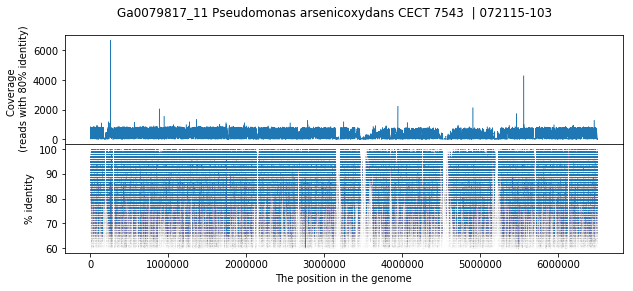

,Start position,End position,Region length,Genes in the island
160,173225.0,196558.0,23333.0,0166 | Integrase; 0167 | Helicase conserved C-...
249,281762.0,303264.0,21502.0,0263 | Site-specific recombinase XerD; 0264 | ...
610,742057.0,749972.0,7915.0,0671 | Integrase; 0672 | hypothetical protein;...
1635,1772211.0,1779082.0,6871.0,1644 | small subunit ribosomal protein S8; 164...
1715,1863987.0,1871564.0,7577.0,1737 | hypothetical protein; 1738 | hypothetic...
1904,2091998.0,2097572.0,5574.0,1956 | 16S; nan; nan; 1959 | 23S
1933,2129633.0,2147191.0,17558.0,"1989 | DNA-binding transcriptional regulator, ..."
2064,2302755.0,2310462.0,7707.0,2162 | hypothetical protein; 2163 | carbonic a...
2131,2374903.0,2380364.0,5461.0,2238 | CS1 type fimbrial major subunit; 2239 |...
2203,2447022.0,2458465.0,11443.0,2294 | Phage integrase family protein; 2295 | ...


In [142]:
## ref genome gff file path
ref_genome_gff_pwd = "/global/projectb/scratch/jzz0026/Sorgum_root_microbes_project/Sorgum_root_microbme/metagenome_assembly_spades/img_psedomonas_genome/2636416065/2636416065.gff"

fig, df = plot_id_posi("2636416065_Sorghum_microbiome_072115-103_1_header_id60.txt","genomecov/2636416065_Sorghum_microbiome_072115-103_1.coverage",ref_genome_gff_pwd,0.01,0.02,0.5,0.5,5000)
df

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anacond

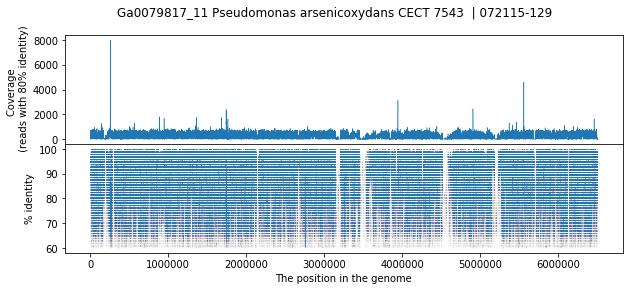

,Start position,End position,Region length,Genes in the island
133,173210.0,196534.0,23324.0,0166 | Integrase; 0167 | Helicase conserved C-...
187,281762.0,303264.0,21502.0,0263 | Site-specific recombinase XerD; 0264 | ...
530,742005.0,749910.0,7905.0,0671 | Integrase; 0672 | hypothetical protein;...
1305,1772191.0,1779124.0,6933.0,1644 | small subunit ribosomal protein S8; 164...
1553,2092043.0,2097578.0,5535.0,1956 | 16S; nan; nan; 1959 | 23S
1578,2129633.0,2149518.0,19885.0,"1989 | DNA-binding transcriptional regulator, ..."
1689,2302755.0,2310646.0,7891.0,2162 | hypothetical protein; 2163 | carbonic a...
1859,2447022.0,2458465.0,11443.0,2294 | Phage integrase family protein; 2295 | ...
1992,2637642.0,2644163.0,6521.0,2499 | Phage integrase family protein; 2500 | ...
1997,2658034.0,2670882.0,12848.0,2522 | putative transposase; 2523 | transposas...


In [143]:
fig, df = plot_id_posi("2636416065_Sorghum_microbiome_072115-129_1_header_id60.txt","genomecov/2636416065_Sorghum_microbiome_072115-129_1.coverage",ref_genome_gff_pwd,0.01,0.02,0.5,0.5,5000)
df


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anacond

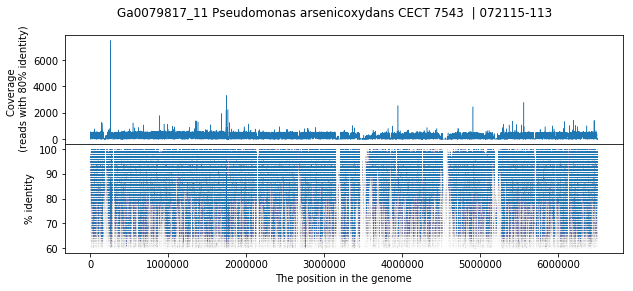

,Start position,End position,Region length,Genes in the island
109,173228.0,196540.0,23312.0,0166 | Integrase; 0167 | Helicase conserved C-...
144,281762.0,303264.0,21502.0,0263 | Site-specific recombinase XerD; 0264 | ...
420,742040.0,749857.0,7817.0,0671 | Integrase; 0672 | hypothetical protein;...
1075,1772212.0,1779123.0,6911.0,1644 | small subunit ribosomal protein S8; 164...
1250,2092079.0,2097568.0,5489.0,1956 | 16S; nan; nan; 1959 | 23S
1262,2129633.0,2147216.0,17583.0,"1989 | DNA-binding transcriptional regulator, ..."
1428,2302755.0,2310220.0,7465.0,2162 | hypothetical protein; 2163 | carbonic a...
1566,2447029.0,2458465.0,11436.0,2294 | Phage integrase family protein; 2295 | ...
1668,2637641.0,2644144.0,6503.0,2499 | Phage integrase family protein; 2500 | ...
1672,2658032.0,2670759.0,12727.0,2522 | putative transposase; 2523 | transposas...


In [144]:
fig, df = plot_id_posi("2636416065_Sorghum_microbiome_072115-113_1_header_id60.txt","genomecov/2636416065_Sorghum_microbiome_072115-113_1.coverage",ref_genome_gff_pwd,0.01,0.02,0.5,0.5,5000)
df